In [ ]:
# https://stackoverflow.com/questions/59376555/how-to-draw-a-transparent-ellipse-in-python-with-pillow-without-outline
!pip install --upgrade Pillow
pass

     |████████████████████████████████| 2.2MB 4.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import math
import IPython.display
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


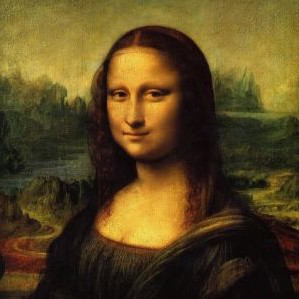

In [ ]:
orginal = Image.open('/content/drive/My Drive/monalisa.jpg')
orginal = np.array(orginal)

IPython.display.display(Image.fromarray(orginal.astype('uint8')))

In [ ]:
def obj_fun(orginal, individual):
    orginal = orginal.astype('int64')
    err = ((orginal - individual)**2).sum()
    return err

In [ ]:
def random_circle():
     x = random.randint(0, 299)
     y = random.randint(0, 299)
     rad = random.randint(5, 100)
     colors = np.random.randint(0, 255, 3)
     opacity = random.randint(50, 150)

     return [x, y, x + rad, y + rad, *colors, opacity]

In [ ]:
def shapes_to_image(chromosome):
    def shape_to_image(shape, draw):
        draw.ellipse([(shape[0], shape[1]), (shape[2], shape[3])], (shape[4], shape[5], shape[6], shape[7]), None, 0)
    img = Image.new('RGB', (299, 299), (0, 0, 0))
    draw = ImageDraw.Draw(img, 'RGBA')
    for shape in chromosome:
        shape_to_image(shape, draw)
    
    return img

In [ ]:
def mutate(dna, max_no_of_circles):
    x = random.random()
    if x<0.5 and len(dna) < max_no_of_circles: 
        dna.append(random_circle())
    else:
        if dna:
            dna.pop(random.randint(0,len(dna)-1))
    if random.random() < 0.5:
        dna = mutate(dna, max_no_of_circles)
    return dna

In [ ]:
def main_loop(generations, population_size, max_no_of_circles):
    population = [[] for _ in range(population_size)]
    best_j = 0
    best = np.Inf
    number_of_circles = np.zeros(generations)
    costs = np.zeros(generations)
    for i in tqdm(range(generations)):

        for j in range(population_size):
            population[j] = mutate(population[j], max_no_of_circles)
            fitness = obj_fun(orginal, shapes_to_image(population[j]))
            if (fitness < best):
                best = fitness
                best_j = j
                circles = population[j].copy()

        for j in range(population_size):
            population[j] = circles.copy()

        if i % 200 is 0:
            IPython.display.display(shapes_to_image(circles))
            print(len(circles))

        costs[i] = best
        number_of_circles[i] = len(circles)

    return population[best_j].copy(), costs, number_of_circles

  0%|          | 0/4000 [00:00<?, ?it/s]

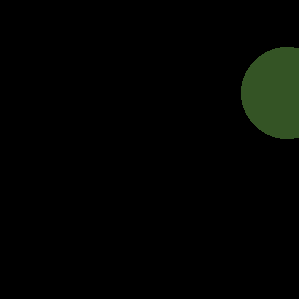

  0%|          | 1/4000 [00:00<15:23,  4.33it/s]

1


  5%|▌         | 200/4000 [01:11<27:31,  2.30it/s]

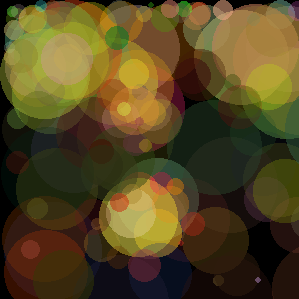

  5%|▌         | 201/4000 [01:12<27:33,  2.30it/s]

133


 10%|█         | 400/4000 [02:40<28:12,  2.13it/s]

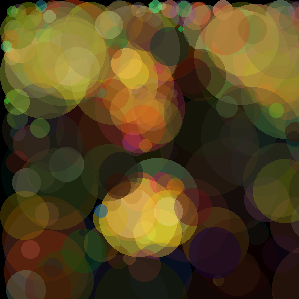

 10%|█         | 401/4000 [02:41<28:29,  2.11it/s]

199


 15%|█▌        | 600/4000 [04:20<28:20,  2.00it/s]

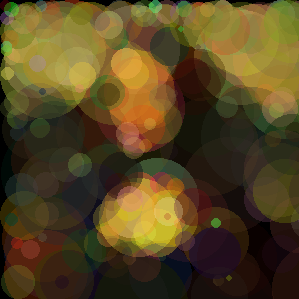

 15%|█▌        | 601/4000 [04:21<28:45,  1.97it/s]

242


 20%|██        | 800/4000 [06:01<27:17,  1.95it/s]

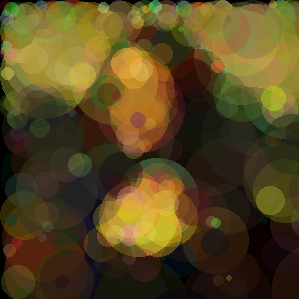

 20%|██        | 801/4000 [06:02<27:23,  1.95it/s]

282


 25%|██▌       | 1000/4000 [07:45<26:52,  1.86it/s]

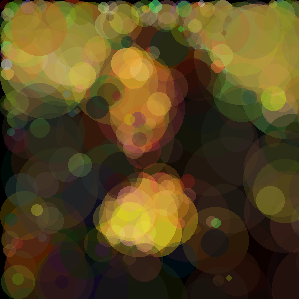

 25%|██▌       | 1001/4000 [07:46<26:54,  1.86it/s]

318


 30%|███       | 1200/4000 [09:32<24:57,  1.87it/s]

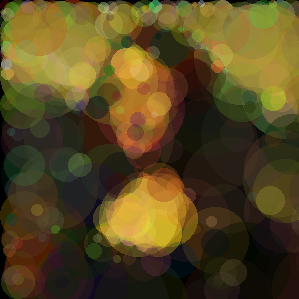

 30%|███       | 1201/4000 [09:33<25:00,  1.87it/s]

326


 35%|███▌      | 1400/4000 [11:21<23:40,  1.83it/s]

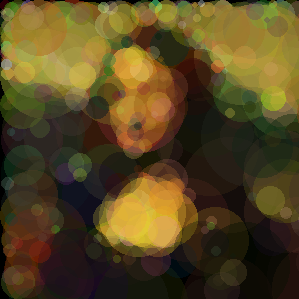

 35%|███▌      | 1401/4000 [11:22<23:51,  1.82it/s]

359


 40%|████      | 1600/4000 [13:12<22:48,  1.75it/s]

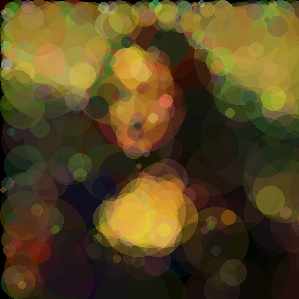

 40%|████      | 1601/4000 [13:13<23:10,  1.73it/s]

381


 45%|████▌     | 1800/4000 [15:07<21:36,  1.70it/s]

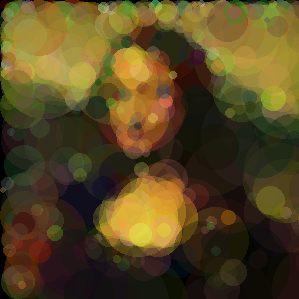

 45%|████▌     | 1801/4000 [15:07<21:40,  1.69it/s]

411


 50%|█████     | 2000/4000 [17:02<19:20,  1.72it/s]

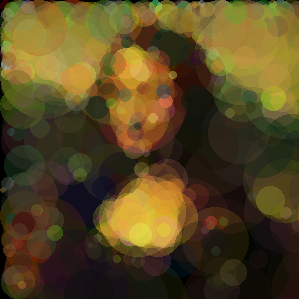

 50%|█████     | 2001/4000 [17:03<19:35,  1.70it/s]

424


 55%|█████▌    | 2200/4000 [19:00<18:32,  1.62it/s]

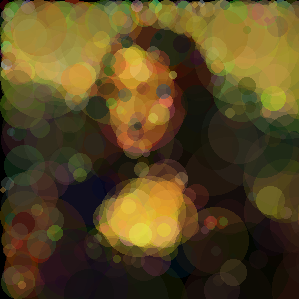

 55%|█████▌    | 2201/4000 [19:01<18:19,  1.64it/s]

436


 60%|██████    | 2400/4000 [20:59<15:41,  1.70it/s]

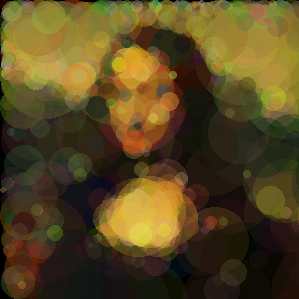

 60%|██████    | 2401/4000 [21:00<15:57,  1.67it/s]

449


 65%|██████▌   | 2600/4000 [22:57<13:40,  1.71it/s]

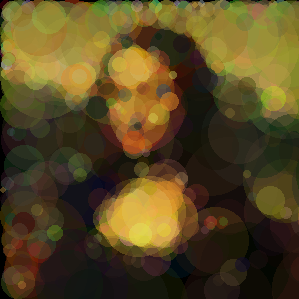

 65%|██████▌   | 2601/4000 [22:57<13:41,  1.70it/s]

450


 70%|███████   | 2800/4000 [24:56<11:38,  1.72it/s]

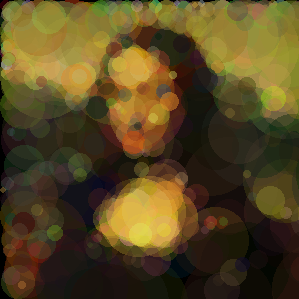

 70%|███████   | 2801/4000 [24:56<11:43,  1.70it/s]

449


 75%|███████▌  | 3000/4000 [26:53<09:26,  1.76it/s]

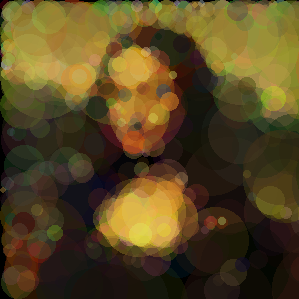

 75%|███████▌  | 3001/4000 [26:53<09:32,  1.74it/s]

450


 80%|████████  | 3200/4000 [28:50<07:37,  1.75it/s]

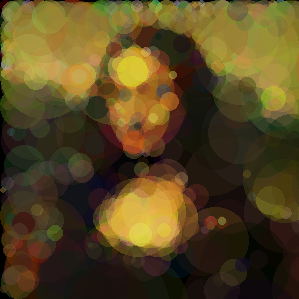

 80%|████████  | 3201/4000 [28:50<07:43,  1.72it/s]

450


 85%|████████▌ | 3400/4000 [30:48<05:47,  1.73it/s]

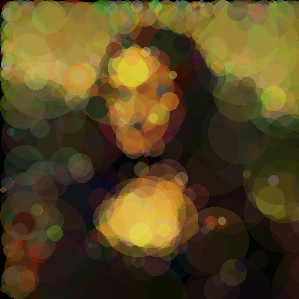

 85%|████████▌ | 3401/4000 [30:48<05:48,  1.72it/s]

449


 90%|█████████ | 3600/4000 [32:43<03:52,  1.72it/s]

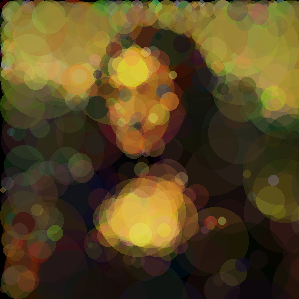

 90%|█████████ | 3601/4000 [32:43<03:56,  1.69it/s]

450


 95%|█████████▌| 3800/4000 [34:39<01:58,  1.69it/s]

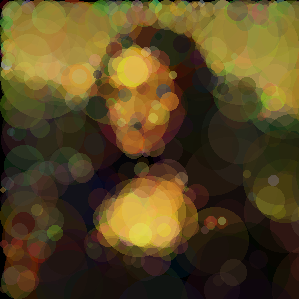

 95%|█████████▌| 3801/4000 [34:40<02:01,  1.64it/s]

450


100%|██████████| 4000/4000 [36:36<00:00,  1.82it/s]


In [ ]:
random.seed(0)
np.random.seed(0)

best, c, no_c = main_loop(4000, 100, 450)

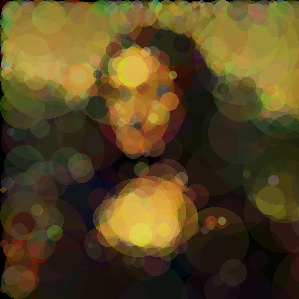

In [ ]:
IPython.display.display(shapes_to_image(best))

84757413.0


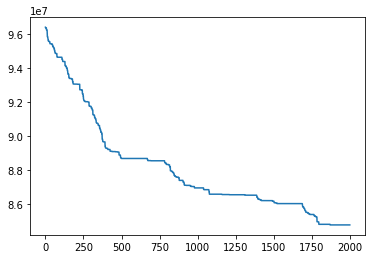

In [ ]:
plt.plot(c[2000:])
print(c[-1]) 

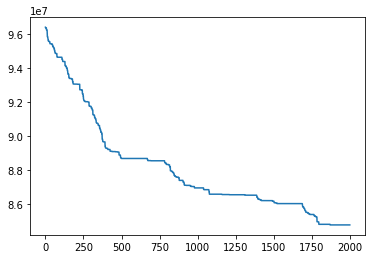

In [ ]:
plt.plot(c[2000:])

450.0


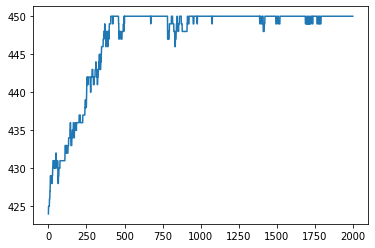

In [ ]:
plt.plot(no_c[2000:])
print(no_c[-1])

In [ ]:
print(c[2600])
no_c[2600]


88675322.0


450.0